# Install packages

In [ ]:
!pip install meteostat

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install qolmat

  Using cached cloudpickle-3.1.0-py3-none-any.whl.metadata (7.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 992.7 kB/s eta 0:00:0000:0100:01
Using cached cloudpickle-3.1.0-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 945.8 kB/s eta 0:00:0000:01:010m
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from meteostat import Point, Daily

# Set plot style
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from qolmat.imputations import imputers

# Load the data

In [10]:
test_path = "https://raw.githubusercontent.com/Trung-Dan-Phan/kaggle_time_series/refs/heads/eda/data/test.csv"
train_path = "https://raw.githubusercontent.com/Trung-Dan-Phan/kaggle_time_series/refs/heads/eda/data/train.csv"

In [11]:
# Load Data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

### 2. Preprocessing

#### Date and Time Features
- [ ] **Extract Date Features**: Extract year, month, day, and hour from the timestamp for each entry.
- [ ] **Cyclic Features**: Add cyclic features for hour and month using sine and cosine transformations.

#### Lag and Rolling Features
- [ ] **Lagged Values**: Create lagged features for each pollutant (1, 24, 168 hours to capture short, daily, and weekly patterns).
- [ ] **Rolling Statistics**: Add rolling mean, rolling standard deviation, and rolling min/max features to smooth trends.

#### Handle Missing Values
- [ ] **Impute Missing Values**: Choose and implement a strategy (e.g., forward-fill, backward-fill, interpolation) for missing data in each pollutant.
- [ ] **Drop or Flag Missing Rows**: If a significant portion of the data is missing, consider dropping those rows or creating an indicator feature to mark them.

#### External Weather Data (Optional but Recommended)
- [ ] **Incorporate Weather Data**: If available, obtain weather data for Paris (temperature, humidity, wind speed).
- [ ] **Merge with Pollutant Data**: Align weather data with your time series dataset based on the timestamp.

#### Data Scaling
- [ ] **Scale Features**: Use standard scaling or min-max scaling for numerical features, especially for pollutants and weather variables (if any).

#### Target Preparation
- [ ] **Prepare Target Variables**: Shift the pollutant columns to create target variables aligned with the forecasting horizon (e.g., next hour, next day).
- [ ] **Split Data**: Divide the data into training and validation sets, ensuring the split respects the time sequence.




# fix the missing values

refer to [qolmat, tsa](https://qolmat.readthedocs.io/en/latest/generated/qolmat.imputations.imputers.ImputerInterpolation.html#qolmat.imputations.imputers.ImputerInterpolation)

In [14]:
# Handling Missing Values

# Replace inf/-inf with NaN (if any)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values (using median as it's robust to outliers)
#imputer = SimpleImputer(strategy='median')
#train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns, index=train_df.index)

In [20]:
train_df.head(2)

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0


In [65]:
imputer = imputers.ImputerInterpolation(method="linear")
fixed_train_df = imputer.fit_transform(train_df)

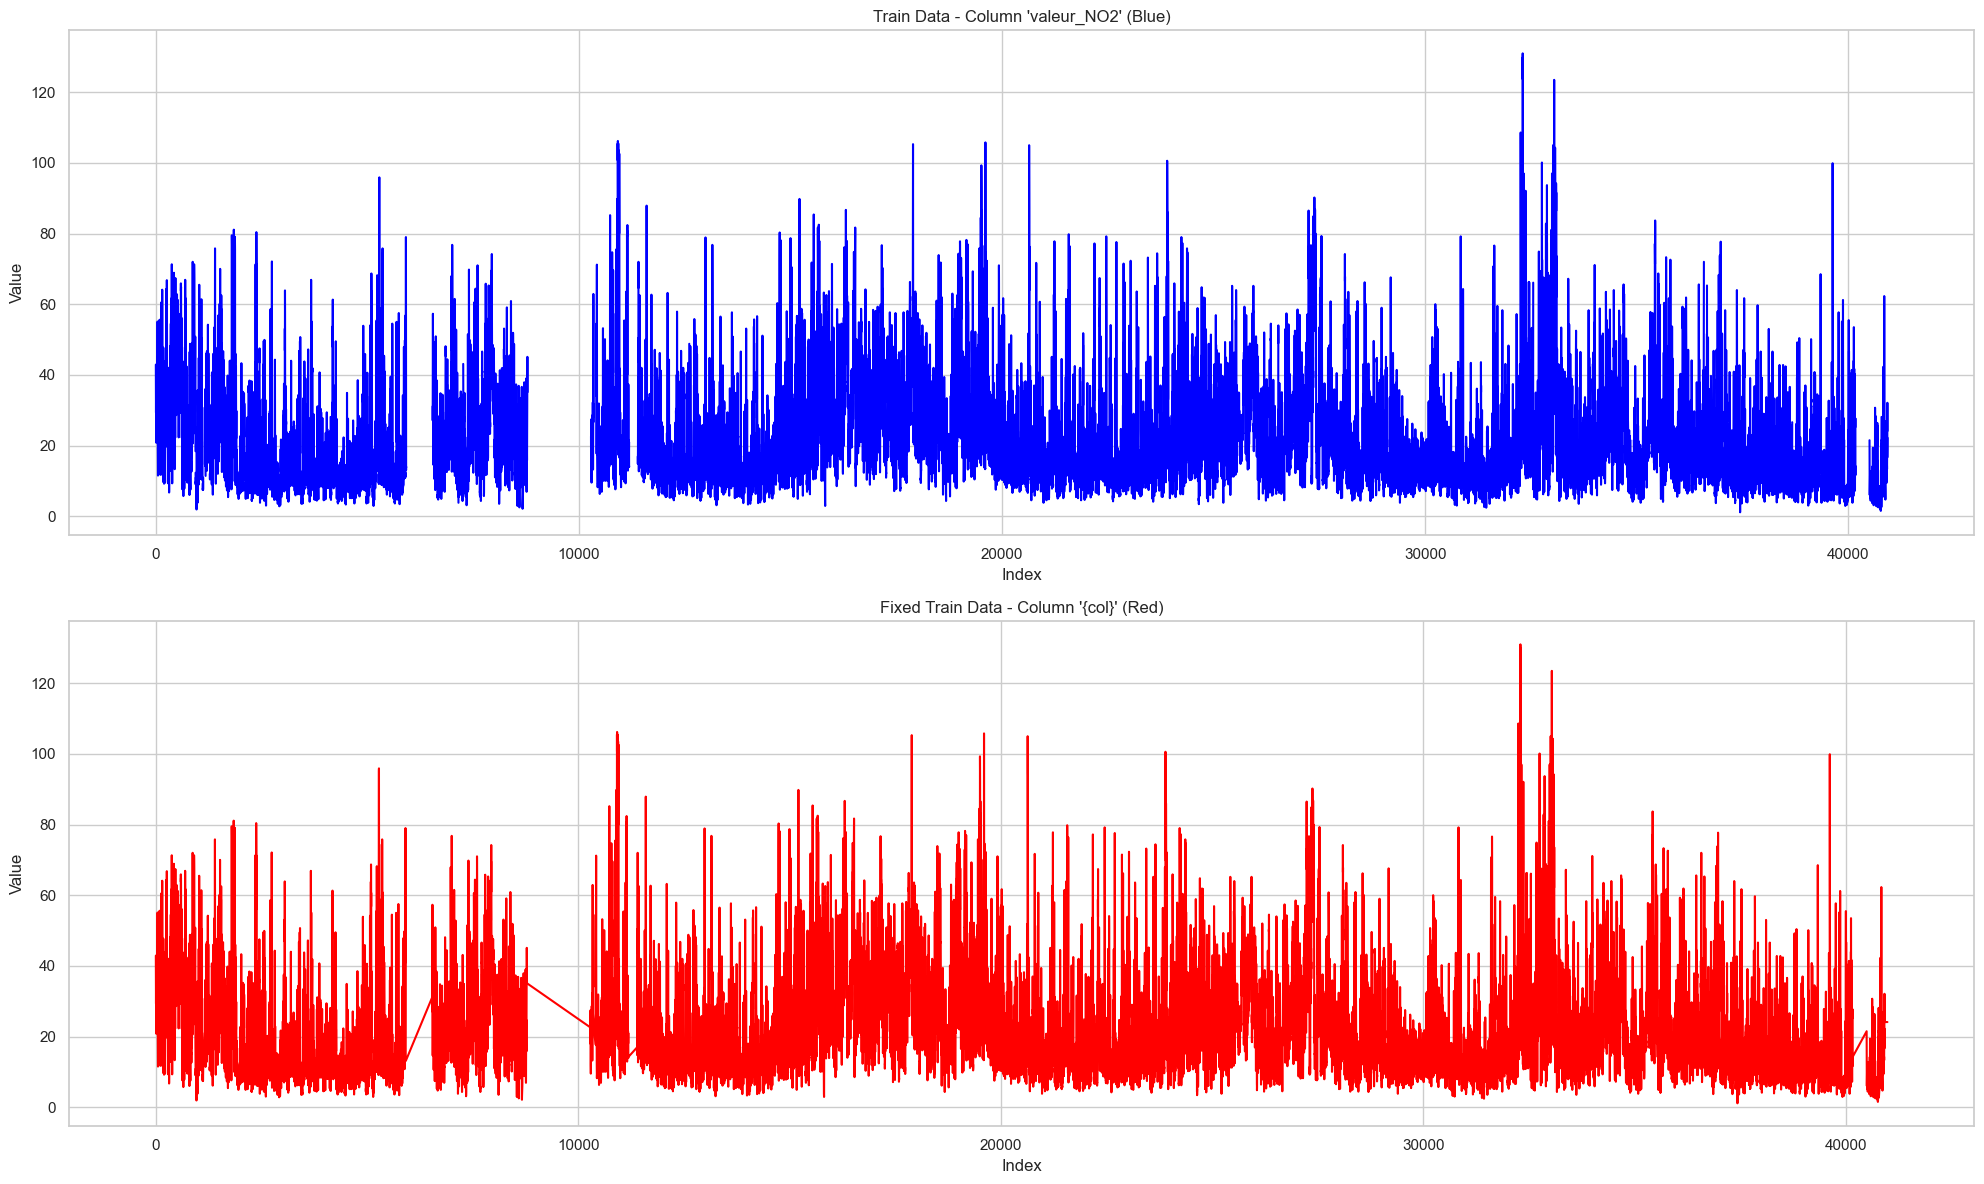

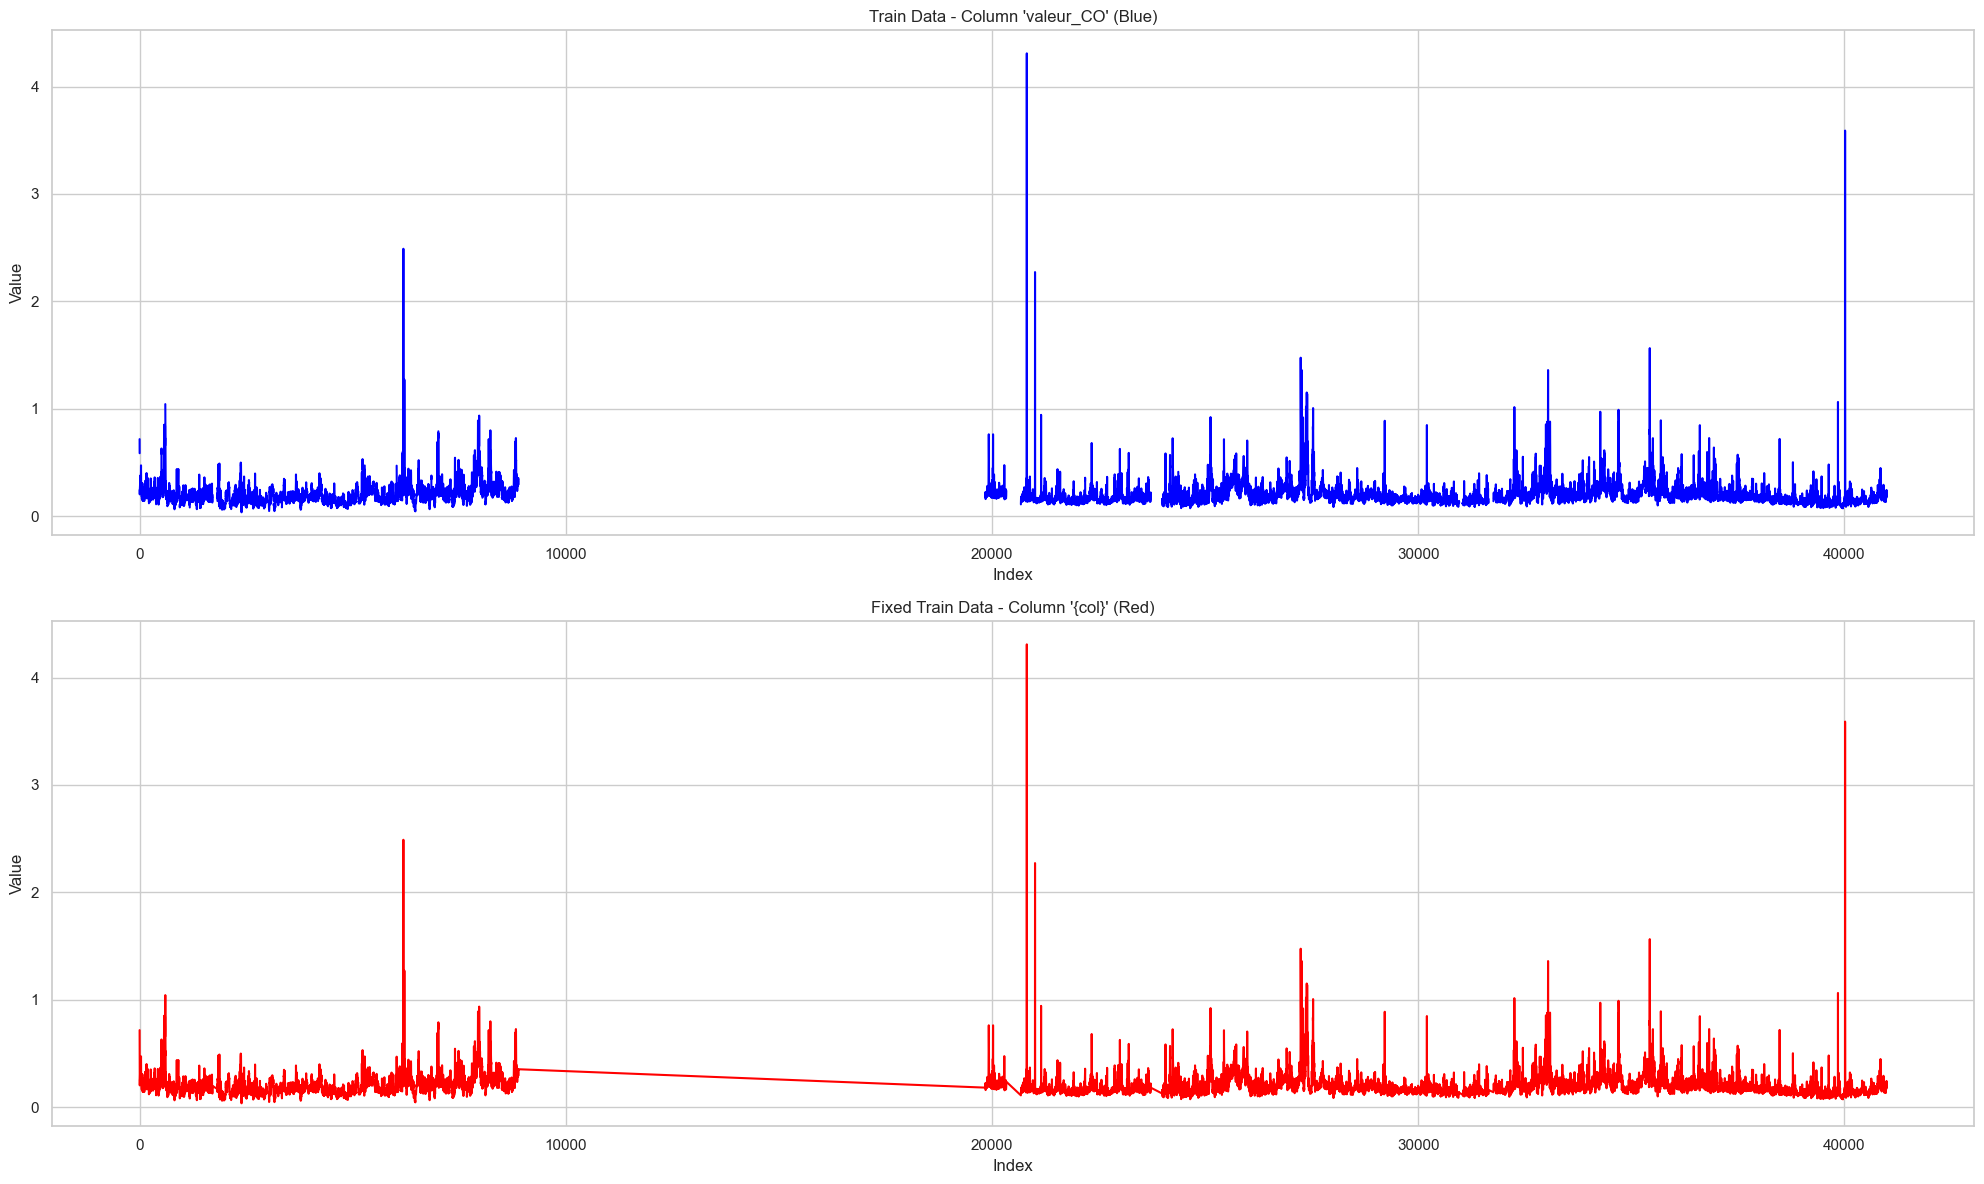

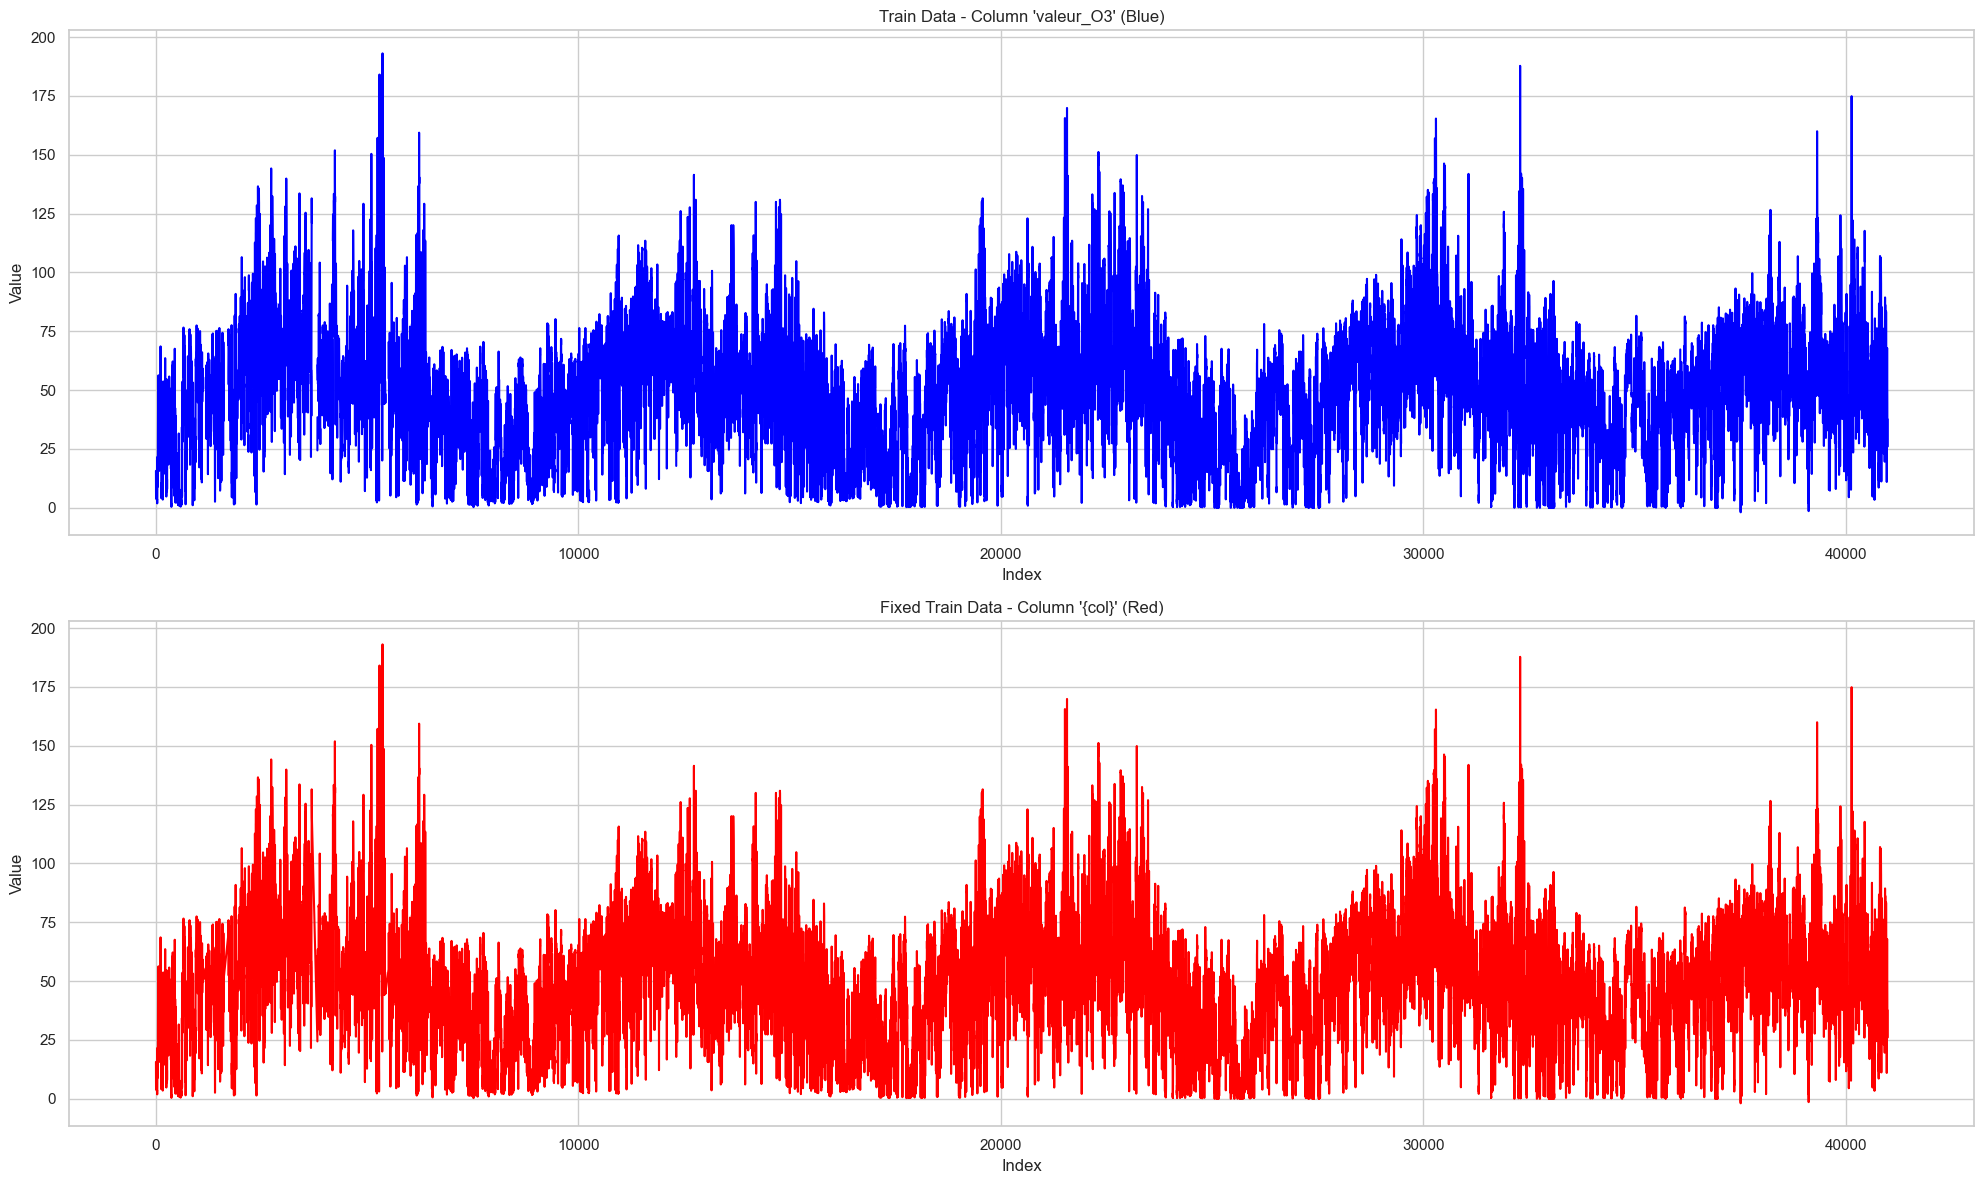

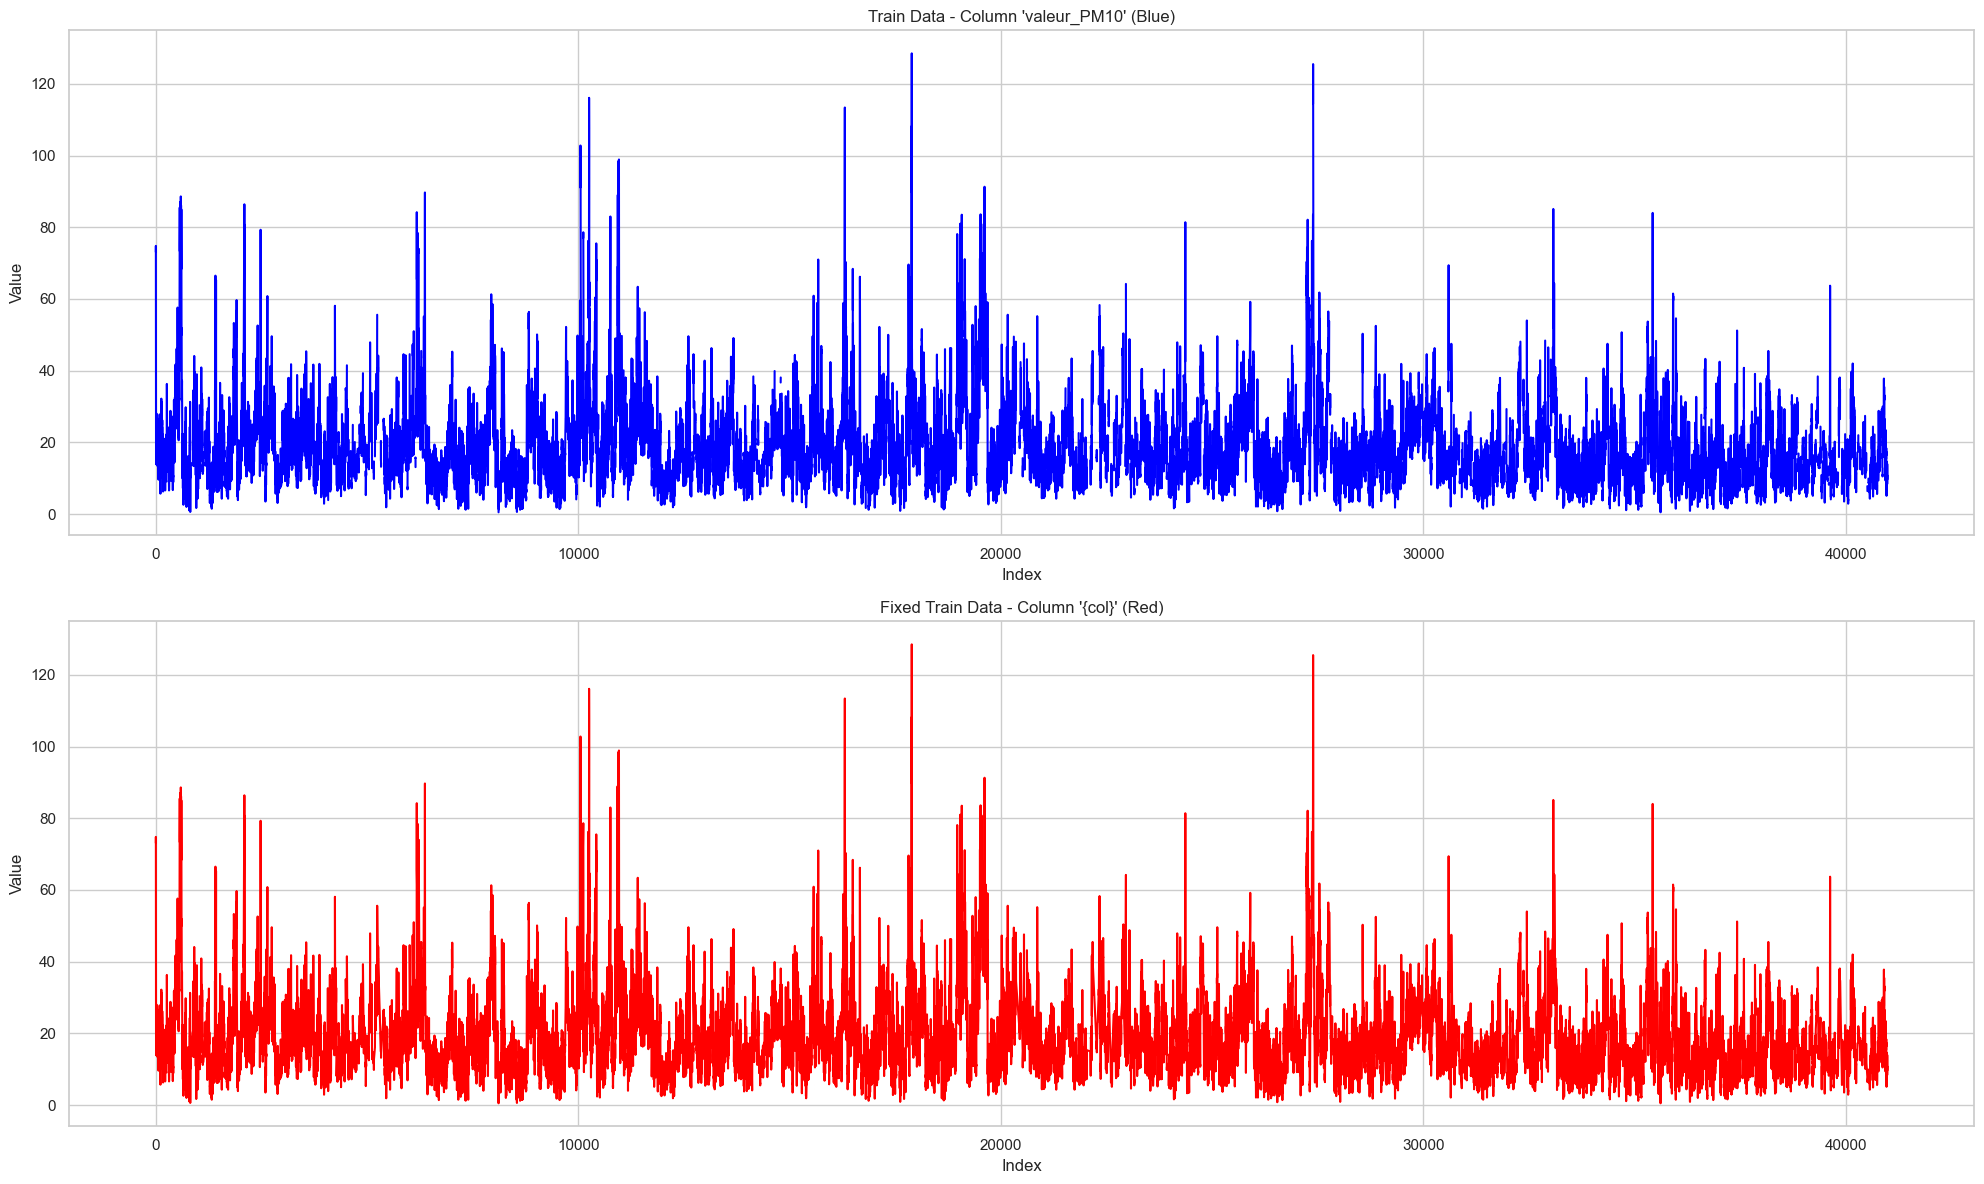

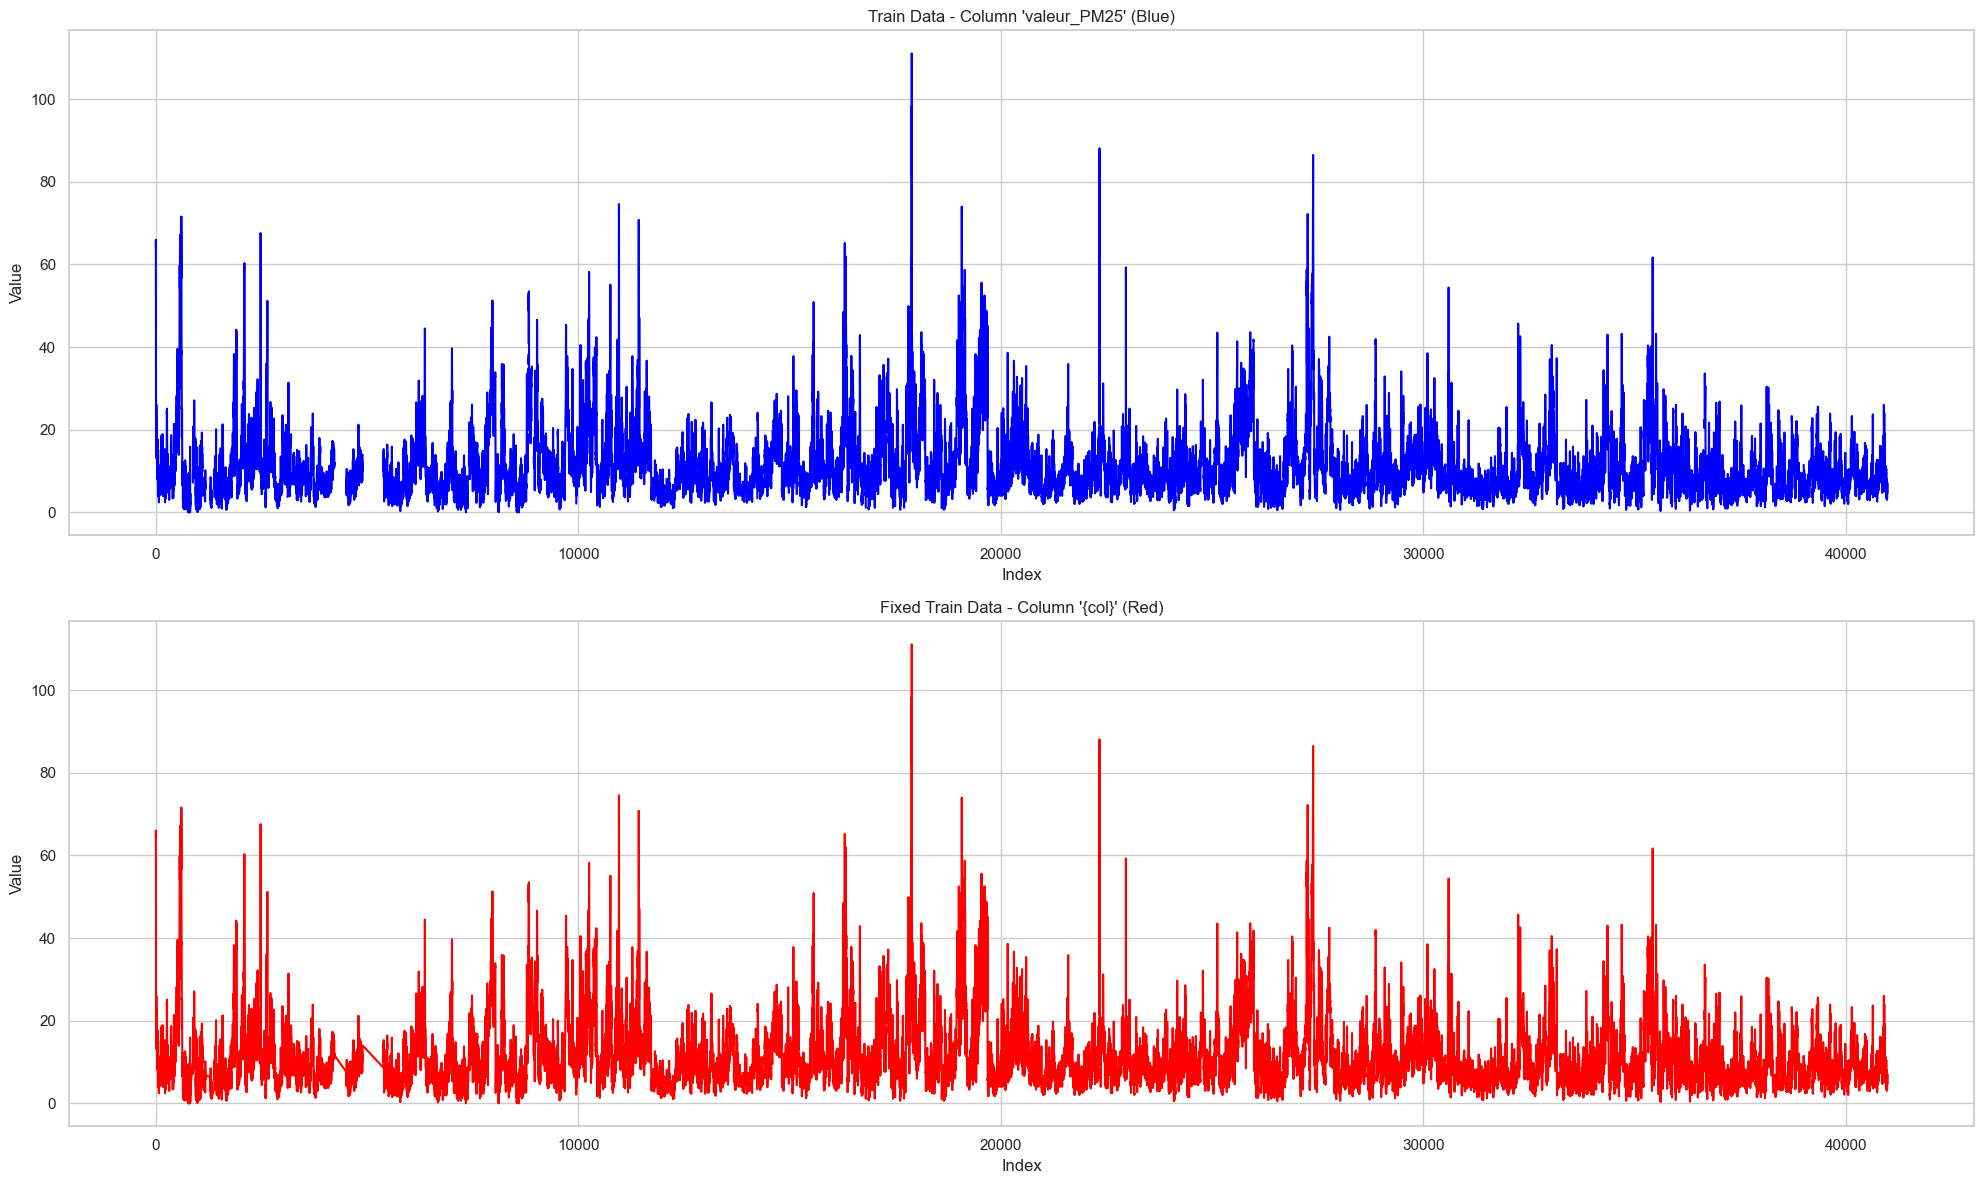

In [69]:
cols = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10',
       'valeur_PM25']
for col in cols:
    plt.figure(figsize=(20, 12))

    # First subplot in blue
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
    train_df[col].plot(kind='line', color='blue', title=f"Train Data - Column '{col}' (Blue)")
    plt.xlabel("Index")
    plt.ylabel("Value")

    # Second subplot in red
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
    fixed_train_df[col].plot(kind='line', color='red', title="Fixed Train Data - Column '{col}' (Red)")
    plt.xlabel("Index")
    plt.ylabel("Value")

    # Display the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


should directly cut some values

In [90]:

def count_consecutive_nulls(df=train_df, date_col = 'id', target_col=''):
    start_dates = []
    null_counts = []

    null_count = 0
    start_date = None

    # Iterate over the DataFrame
    for i, row in df.iterrows():
        if pd.isna(row[target_col]):
            # If null, increase the count and set the start date if it's the first in the sequence
            if null_count == 0:
                start_date = row[date_col]  # Store the start date of the null sequence
            null_count += 1
        else:
            # If not null and there was a sequence of nulls, store the result
            if null_count > 0:
                start_dates.append(start_date)
                null_counts.append(null_count)
                # Reset count and start date
                null_count = 0
                start_date = None

    # Check if there's an ongoing sequence at the end of the loop
    if null_count > 0:
        start_dates.append(start_date)
        null_counts.append(null_count)

    # Compile the result into a dictionary
    result = {"start_date": start_dates, "null_num": null_counts}

    # Convert to DataFrame for easier visualization if needed
    result_df = pd.DataFrame(result)
    result_df = result_df.sort_values(by='null_num', ascending=False)
    result_df['percentage'] = result_df['null_num']/df.shape[0]*100
    print(result_df.head(5))


In [91]:

for target in cols:
    print(f"{target}")
    count_consecutive_nulls(target_col = target)
    print("\n")

valeur_NO2
        start_date  null_num  percentage
77   2021-01-01 00      1500    3.659340
62   2020-09-03 14       624    1.522285
154  2024-07-31 15       331    0.807494
82   2021-04-11 02       203    0.495231
160  2024-09-01 02        69    0.168330


valeur_CO
        start_date  null_num  percentage
373  2021-01-05 09     10949   26.710741
374  2022-04-27 08       341    0.831890
381  2022-09-15 17       258    0.629406
394  2023-08-11 18       114    0.278110
78   2020-03-12 09       102    0.248835


valeur_O3
       start_date  null_num  percentage
8   2020-06-02 19       131    0.319582
3   2020-03-08 02       105    0.256154
13  2020-08-14 06        78    0.190286
2   2020-02-16 17        65    0.158571
50  2023-04-13 08        29    0.070747


valeur_PM10
        start_date  null_num  percentage
351  2022-07-13 06        90    0.219560
348  2022-07-07 06        85    0.207363
285  2022-04-28 12        84    0.204923
566  2023-09-08 05        66    0.161011
76   2020-08-0

end


In [ ]:
# Scaling/Normalization

# Select features for scaling (all pollutant columns and lags)
scaler = StandardScaler()
pollutant_columns = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25'] 
pollutant_columns = pollutant_columns + [f'{col}_lag_{lag}' for col in pollutant_columns for lag in lags]
train_df[pollutant_columns] = scaler.fit_transform(train_df[pollutant_columns])

In [ ]:
# Adding External Weather Data

# Define the time period for which we need the data
start_date = train_df.index.min()
end_date = train_df.index.max()

# Define the location (Paris coordinates)
paris = Point(48.8566, 2.3522)

# Fetch daily historical data for Paris from Meteostat
weather_data = Daily(paris, start_date, end_date)
weather_data = weather_data.fetch()

# Display the first few rows of the weather data
print(weather_data.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2020-01-02   7.3   4.3   9.2   1.3   NaN  186.0   8.1  35.0  1026.4   NaN
2020-01-03   9.8   8.5  12.2   0.5   NaN  249.0  15.7  41.0  1024.8   NaN
2020-01-04   7.3   4.3  11.0   0.3   NaN  309.0   9.7  33.0  1035.8   NaN
2020-01-05   7.8   7.1   9.1   0.0   NaN  265.0   5.4  21.0  1036.3   NaN
2020-01-06   4.7   1.6   8.3   0.0   NaN  180.0   9.5  55.0  1027.6   NaN


In [ ]:
# Reset index in `weather_data` to use the date as a regular column
weather_data = weather_data.reset_index()
weather_data['weather_time'] = weather_data['time'].dt.floor('D')  # Convert to daily frequency

train_df = train_df.reset_index()
train_df['air_quality_time'] = train_df['id'].dt.floor('D')

# Merge the weather data with your air quality data
merged_df = pd.merge(train_df, weather_data, left_on='air_quality_time', right_on='weather_time', how='left')

# Drop unnecessary columns and clean up
merged_df = merged_df.drop(columns=['air_quality_time', 'weather_time'])

# Save the combined DataFrame to a new CSV file
merged_df.to_csv('../data/train_with_weather.csv', index=False)

In [ ]:
# Target Variable Extraction

train_processed = pd.read_csv('../data/train_with_weather.csv')

target_columns = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Separate features and target for training
X_train = train_processed.drop(columns=target_columns)
y_train = train_processed[target_columns]

# Test set only has features, as targets are unknown
X_test = test_df.reset_index()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (40967, 37)
y_train shape: (40967, 5)
X_test shape: (504, 6)


Need to do the same preprocessing for X_test to get the same columns as X_train